# CS5228 Rental Prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import History

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


# load data
train_data = pd.read_csv('./data/processed/train.csv')
test_data = pd.read_csv('./data/processed/test.csv')

X, y = train_data.drop(columns='monthly_rent'), train_data['monthly_rent'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='swish'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='swish'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam')

In [2]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=128, verbose=1)

Epoch 1/500


2023-11-04 23:00:25.681809: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


325/325 [==============================] - 1s 1ms/step - loss: 1090.6003 - val_loss: 438.8741
Epoch 2/500
325/325 [==============================] - 0s 854us/step - loss: 416.6428 - val_loss: 400.7657
Epoch 3/500
325/325 [==============================] - 0s 909us/step - loss: 398.7034 - val_loss: 393.7807
Epoch 4/500
325/325 [==============================] - 0s 973us/step - loss: 393.4682 - val_loss: 389.4298
Epoch 5/500
325/325 [==============================] - 0s 867us/step - loss: 390.7419 - val_loss: 385.9378
Epoch 6/500
325/325 [==============================] - 0s 802us/step - loss: 386.8590 - val_loss: 386.2428
Epoch 7/500
325/325 [==============================] - 0s 851us/step - loss: 384.8846 - val_loss: 383.4973
Epoch 8/500
325/325 [==============================] - 0s 792us/step - loss: 384.2632 - val_loss: 383.1737
Epoch 9/500
325/325 [==============================] - 0s 792us/step - loss: 383.1040 - val_loss: 388.1014
Epoch 10/500
325/325 [============================

In [3]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


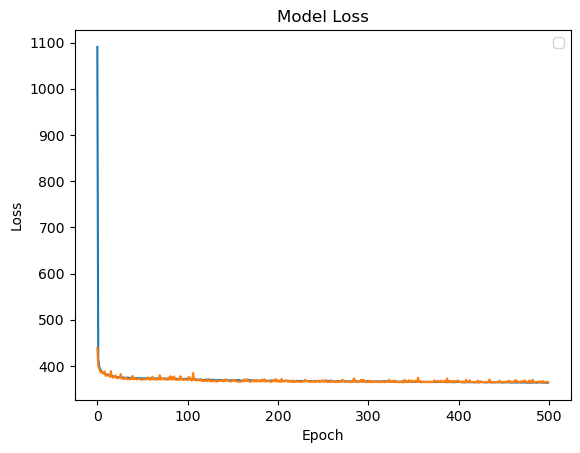

In [4]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


557/557 [==============================] - 0s 367us/step
Root Mean Squared Error: 488.12540356593075
Mean Absolute Error: 364.2580165601874
557/557 [==============================] - 0s 441us/step


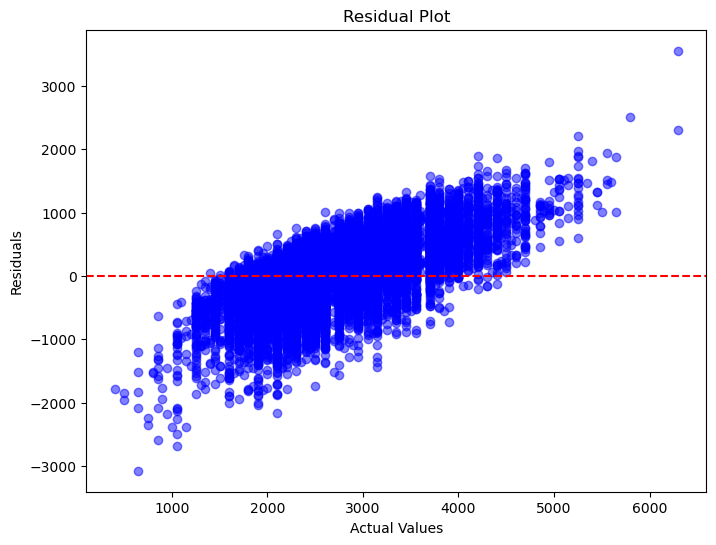

In [6]:
predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
y_pred = model.predict(X_test)

residuals = y_test - y_pred.flatten()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)  
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [7]:
name_DNN = 'DNN'

y_pred = model.predict(test_data)

y_pred = y_pred.reshape(-1)
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_DNN + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_DNN} training result saved.\n')

938/938 [==============================] - 0s 369us/step
DNN training result saved.

